# Author:

- Huu Khang Nguyen - 7402909
- hkn878@uowmail.edu.au


# Environment:

- Python 3.10.8
- Ubuntu 22.04.2 LTS x86_64
- With GPU

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

2023-05-03 22:25:25.846064: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 22:25:25.868728: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 22:25:25.869226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 22:25:26.349467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.__version__

'2.12.0'

In [3]:
# check available gpu
tf.config.list_physical_devices('GPU')

2023-05-03 22:25:27.416298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-03 22:25:27.416699: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[]

## Load && preprocessing the dataset

In [4]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
           'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('./data/magic04.data', names=columns)


In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in df.columns:
    if(col == 'class'): continue
    scalerData = scaler.fit_transform(df[col].values.reshape(-1, 1))
    df[col] =  scalerData

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866,0
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125,0
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635,0
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463,0
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427,0


### Split the dataset by 70% training and 30% testing

In [9]:
y = df['class']
X = df.drop(columns=['class'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=70, random_state=42, shuffle=True)

In [11]:
X_train.shape

(70, 10)

In [12]:
num_classes = len(set(y))

In [33]:
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [34]:
model = Sequential([
    Flatten(input_shape=(10,)),
    Dense(100, activation="relu",),
    Dense(100, activation="relu"),
    Dense(num_classes, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["sparse_categorical_accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
1/1 [==============================] - 0s 319ms/step - loss: 0.6213 - sparse_categorical_accuracy: 0.7857
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5805 - sparse_categorical_accuracy: 0.8000
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5439 - sparse_categorical_accuracy: 0.8000
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5121 - sparse_categorical_accuracy: 0.8143
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4847 - sparse_categorical_accuracy: 0.8143
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4612 - sparse_categorical_accuracy: 0.8286
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4409 - sparse_categorical_accuracy: 0.8286
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4233 - sparse_categorical_accuracy: 0.8286
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4082 -

(0.0, 1.0)

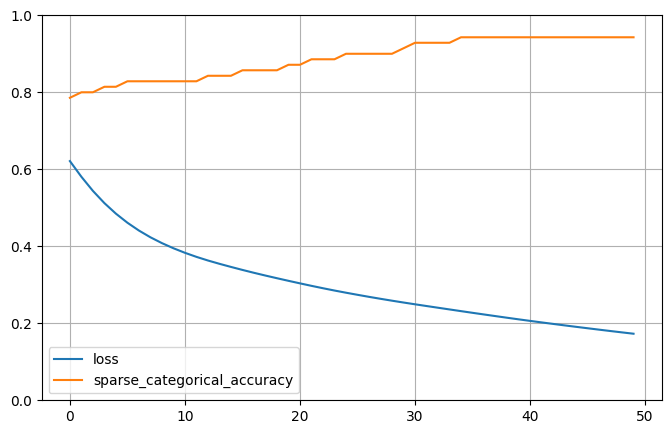

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [17]:
model.evaluate(X_test, y_test)

593/593 [==============================] - 0s 412us/step - loss: 0.5449 - sparse_categorical_accuracy: 0.7659


[0.5448765754699707, 0.7658575177192688]

In [22]:
prob = model.predict(X_test)

593/593 [==============================] - 0s 375us/step


In [23]:
prob

array([[0.7950951 , 0.20490491],
       [0.98528963, 0.01471037],
       [0.9722065 , 0.02779348],
       ...,
       [0.92548907, 0.07451087],
       [0.9432183 , 0.05678173],
       [0.99018127, 0.00981872]], dtype=float32)

In [24]:
prediction = np.argmax(prob, axis=-1)

In [31]:
prediction_with_label = le.inverse_transform(prediction)

In [32]:
prediction_with_label

array(['g', 'g', 'g', ..., 'g', 'g', 'g'], dtype=object)

## Hyperparameter fine-tunning

In [35]:
def build_model(n_hidden=1, n_neurons=30, optimizer='adam', input_shape=(10,)):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))

    # output layer
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [36]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/tmp/ipykernel_12822/1341954221.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [37]:
from sklearn.model_selection import GridSearchCV
param_distribs = {
    "n_hidden": [2, 4, 6, 8, 10],
    "n_neurons": [100, 200, 300],
    "optimizer": ['SGD', 'adam']
}
rnd_search_cv = GridSearchCV(keras_clf, param_distribs, cv=5)
rnd_search_cv.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 2ms/step - loss: 0.7288 - accuracy: 0.2679
Epoch 2/50
2/2 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.3750
Epoch 3/50
2/2 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.4286
Epoch 4/50
2/2 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5536
Epoch 5/50
2/2 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6429
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7321
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.8214
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.8214
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.8750
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.8750
Epoch 11/50
2/2 [======================

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2220557ed0>,
             param_grid={'n_hidden': [2, 4, 6, 8, 10],
                         'n_neurons': [100, 200, 300],
                         'optimizer': ['SGD', 'adam']})

In [1]:
rnd_search_cv.best_params_

NameError: name 'rnd_search_cv' is not defined